In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import efel

In [ ]:
from LCNE_patchseq_analysis.efel.pipeline import extract_cell_level_stats_in_

In [9]:
from LCNE_patchseq_analysis.efel.io import load_efel_features_from_roi

loaded = load_efel_features_from_roi("1212557784")


In [10]:
loaded.keys()


dict_keys(['df_features_original', 'df_features_per_spike', 'df_features_per_sweep', 'df_peri_stimulus_raw_traces', 'df_spike_waveforms', 'df_sweeps', 'efel_settings'])

In [11]:
loaded["df_sweeps"].columns

Index(['ephys_roi_id', 'sweep_number', 'stimulus_units', 'bridge_balance_mohm',
       'leak_pa', 'stimulus_scale_factor', 'stimulus_code',
       'stimulus_code_ext', 'clamp_mode', 'stimulus_name', 'tags',
       'stimulus_start_time', 'stimulus_amplitude', 'stimulus_duration',
       'stimulus_interval', 'pre_noise_rms_mv', 'post_vm_mv',
       'post_noise_rms_mv', 'pre_vm_mv', 'slow_vm_mv', 'slow_noise_rms_mv',
       'vm_delta_mv', 'passed', 'reasons', 'peak_deflection', 'num_spikes',
       'efel_num_spikes', 'efel_first_spike_AP_width'],
      dtype='object')

In [52]:
df_features_per_sweep = loaded["df_features_per_sweep"].merge(
    loaded["df_sweeps"], on="sweep_number")
df_features_per_sweep_with_spike = df_features_per_sweep.query("spike_count > 0")

In [74]:
[col for col in df_features_per_sweep.columns 
                               if "first_spike_" in col
                               and not any(k in col for k in ["indices", "AP_begin_time", "peak_time"])
                               ]

,first_spike_ADP_peak_amplitude,first_spike_ADP_peak_values,first_spike_AHP_depth,first_spike_AHP_depth_abs,first_spike_AHP_depth_from_peak,first_spike_AHP_time_from_peak,first_spike_AP_amplitude,first_spike_AP_amplitude_from_voltagebase,first_spike_AP_begin_voltage,first_spike_AP_begin_width,...,first_spike_AP_phaseslope,first_spike_AP_rise_rate,first_spike_AP_rise_time,first_spike_AP_width,first_spike_AP_width_between_threshold,first_spike_min_AHP_values,first_spike_min_between_peaks_values,first_spike_peak_voltage,first_spike_spike_half_width,efel_first_spike_AP_width
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00000,-54.28125,5.779000,-54.28125,78.62500,1.06,NaN,84.404000,-36.18750,0.76,...,22.058823,168.142361,0.36,0.40,0.40,-54.28125,-54.28125,24.34375,0.437431,0.40
2,0.00000,-54.56250,5.348968,-54.56250,78.37500,1.12,NaN,83.723968,-37.96875,0.82,...,9.375000,162.582237,0.38,0.38,0.38,-54.56250,-54.56250,23.81250,0.432622,0.38
3,0.00000,-54.65625,4.826957,-54.65625,78.00000,1.02,NaN,82.826957,-36.90625,0.76,...,26.249999,177.205882,0.34,0.40,0.40,-54.65625,-54.65625,23.34375,0.429672,0.40
4,0.00000,-54.81250,4.575623,-54.81250,77.71875,1.06,NaN,82.294373,-37.81250,0.80,...,6.481481,159.786184,0.38,0.38,0.38,-54.81250,-54.81250,22.90625,0.431553,0.38
5,0.00000,-53.71875,6.248298,-53.71875,77.90625,1.08,58.03125,84.154548,-33.84375,0.80,...,12.962963,152.713816,0.38,0.42,0.42,-53.71875,-53.71875,24.18750,0.462142,0.42
6,0.00000,-52.21875,7.893692,-52.21875,70.37500,1.20,51.84375,78.268692,-33.68750,0.78,...,25.641025,144.010417,0.36,0.40,0.40,-52.21875,-52.21875,18.15625,0.481170,0.40
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.78125,-47.03125,7.904402,-51.81250,64.65625,1.32,46.62500,72.560652,-33.78125,0.80,...,27.439024,137.132353,0.34,0.38,0.38,-51.81250,-60.75000,12.84375,0.499295,0.38
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_features_per_sweep[["first_spike_AP_end_indices", "inv_time_to_first_spike"]]

,first_spike_AP_end_indices,inv_time_to_first_spike
0,NaN,NaN
1,89571.0,0.943200
2,88511.0,0.962464
3,88136.0,0.969462
4,87880.0,0.974279
5,39688.0,15.989767
6,42623.0,8.250825
7,NaN,NaN
8,71748.0,1.421141
9,NaN,NaN


In [51]:
from LCNE_patchseq_analysis.efel.population import df_sweep_selector
df_sweep_selector(df_features_per_sweep, "long_square_supra", "kj")

ValueError: aggregate_method must be 'aver' or 'min'

In [15]:
df_features_per_sweep.query(
            "stimulus_code == 'X6SP_Rheo'"
        )["first_spike_AP_width"].mean()

np.float64(0.33999999999969077)

In [76]:
df_features_per_sweep[[col for col in df_features_per_sweep.columns if "sag" in col]]

,sag_amplitude,sag_ratio1,sag_ratio2,sag_time_constant
0,3.042831,0.377667,0.622333,84.402380
1,5.516475,0.425293,0.574707,56.133024
2,20.116475,0.682035,0.317965,7.250039
3,9.827800,0.465540,0.534460,51.668994
4,11.889212,0.488025,0.511975,78.238794
5,NaN,NaN,92.587159,NaN
6,NaN,NaN,-123.086726,NaN
7,NaN,NaN,-23.172419,NaN
8,NaN,NaN,-0.191230,NaN
9,NaN,NaN,7.372281,NaN


In [ ]:
["sag_ratio1 @ subthreshold, 50", "sag_ratio1 @ subthreshold, 90", "sag_ratio1 @ subthreshold, aver"]
["first_spike_AP_width @ short_square_rheo, min", "first_spike_AP_width @ short_square_rheo, aver"]
["first_spike_AP_width @ long_square_rheo, min", "first_spike_AP_width @ long_square_rheo, aver"]
["first_spike_AP_width @ long_square_supra, min", "first_spike_AP_width @ long_square_supra, aver"]

In [45]:
sweep_keys = ["sweep_number", "stimulus_code", "stimulus_name", "stimulus_amplitude", "passed", "reasons", "vm_delta_mv", "slow_noise_rms_mv"]

In [46]:
df_features_per_sweep.loc[df_features_per_sweep["sag_ratio1"].notna(), sweep_keys + ["sag_amplitude", "sag_ratio1"]]

,sweep_number,stimulus_code,stimulus_name,stimulus_amplitude,passed,reasons,vm_delta_mv,slow_noise_rms_mv,sag_amplitude,sag_ratio1
0,5,X1PS_SubThresh,Long Square,-29.999998,True,[],0.361881,0.344871,3.042831,0.377667
1,6,X1PS_SubThresh,Long Square,-50.000000,True,[],0.148632,0.326613,5.516475,0.425293
2,7,X1PS_SubThresh,Long Square,-70.000000,True,[],0.480446,0.252721,20.116475,0.682035
3,8,X1PS_SubThresh,Long Square,-90.000000,True,[],0.922310,0.302951,9.827800,0.465540
4,9,X1PS_SubThresh,Long Square,-110.000000,True,[],0.557930,0.250871,11.889212,0.488025


In [50]:
df_features_per_sweep_with_spike[sweep_keys + ["first_spike_AP_width", "spike_count", "sag_amplitude"]].sort_values("stimulus_code")

,sweep_number,stimulus_code,stimulus_name,stimulus_amplitude,passed,reasons,vm_delta_mv,slow_noise_rms_mv,first_spike_AP_width,spike_count,sag_amplitude
1,6,X1PS_SubThresh,Long Square,-50.000000,True,[],0.148632,0.326613,0.40,9,5.516475
2,7,X1PS_SubThresh,Long Square,-70.000000,True,[],0.480446,0.252721,0.38,8,20.116475
3,8,X1PS_SubThresh,Long Square,-90.000000,True,[],0.922310,0.302951,0.40,10,9.827800
4,9,X1PS_SubThresh,Long Square,-110.000000,True,[],0.557930,0.250871,0.38,10,11.889212
5,16,X3LP_Rheo,Long Square,29.999998,True,[],0.753784,0.485972,0.42,3,NaN
6,17,X3LP_Rheo,Long Square,20.000000,True,[],0.106968,0.298069,0.40,2,NaN
8,19,X3LP_Rheo,Long Square,12.000000,True,[],0.277767,0.243412,0.38,1,NaN
30,67,X3LP_Rheo,Long Square,36.000000,True,[],0.853378,0.311889,0.40,1,NaN
26,63,X3LP_Rheo,Long Square,40.000000,True,[],0.153202,0.318450,0.38,1,NaN
34,72,X4PS_SupraThresh,Long Square,126.000000,True,[],0.287926,0.321641,0.36,24,NaN


In [6]:
[col for col in df_features_per_sweep.columns if "first_spike" in col]

['first_spike_ADP_peak_amplitude',
 'first_spike_ADP_peak_indices',
 'first_spike_ADP_peak_values',
 'first_spike_AHP_depth',
 'first_spike_AHP_depth_abs',
 'first_spike_AHP_depth_from_peak',
 'first_spike_AHP_time_from_peak',
 'first_spike_AP_amplitude',
 'first_spike_AP_amplitude_from_voltagebase',
 'first_spike_AP_begin_indices',
 'first_spike_AP_begin_time',
 'first_spike_AP_begin_voltage',
 'first_spike_AP_begin_width',
 'first_spike_AP_duration',
 'first_spike_AP_duration_half_width',
 'first_spike_AP_end_indices',
 'first_spike_AP_fall_indices',
 'first_spike_AP_fall_rate',
 'first_spike_AP_fall_time',
 'first_spike_AP_height',
 'first_spike_AP_peak_downstroke',
 'first_spike_AP_peak_upstroke',
 'first_spike_AP_phaseslope',
 'first_spike_AP_rise_indices',
 'first_spike_AP_rise_rate',
 'first_spike_AP_rise_time',
 'first_spike_AP_width',
 'first_spike_AP_width_between_threshold',
 'inv_time_to_first_spike',
 'first_spike_min_AHP_indices',
 'first_spike_min_AHP_values',
 'first_sp

In [8]:
df_features_per_sweep[["first_spike_AP_width"]]

,first_spike_AP_width
sweep_number,
10,NaN
12,NaN
13,NaN
15,NaN
16,NaN
20,NaN
22,NaN
23,NaN
33,1.26


In [40]:
loaded["df_features_per_spike"].reset_index().groupby("sweep_number").spike_idx.max()

sweep_number
52      2
66      3
93      0
95      5
97      5
100     5
108     4
110     2
113     0
116     0
118     4
122     0
128    10
129    12
134    16
135    20
136    25
137    30
139    43
140     8
142    15
144     5
146     5
147     2
149    22
150    28
151    37
153    52
Name: spike_idx, dtype: int64

In [41]:
spike_count = loaded["df_features_per_sweep"].spike_count
spike_count[spike_count > 0] - 1

sweep_number
52      2
66      3
93      0
95      5
97      5
100     5
108     4
110     2
113     0
116     0
118     4
122     0
128    10
129    12
134    16
135    20
136    25
137    30
139    43
140     8
142    15
144     5
146     5
147     2
149    22
150    28
151    37
153    52
Name: spike_count, dtype: int64

In [42]:
loaded["df_features_original"]

,ADP_peak_amplitude,ADP_peak_indices,ADP_peak_values,AHP1_depth_from_peak,AHP2_depth_from_peak,AHP_depth,AHP_depth_abs,AHP_depth_abs_slow,AHP_depth_diff,AHP_depth_from_peak,...,inv_ISI_values,inv_first_ISI,inv_second_ISI,inv_third_ISI,inv_fourth_ISI,inv_fifth_ISI,inv_last_ISI,activation_time_constant,deactivation_time_constant,inactivation_time_constant
sweep_number,,,,,,,,,,,,,,,,,,,,,
21,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,[183.8063169210652],[46.27371689982107],[46.27609171198647]
26,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,[3.0076727717624774],[33.54976395128607],[33.54876000072911]
32,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,[193.23096323919924],[32.18997391834722],[32.18509033039048]
38,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,[1.0],[28.376659063619826],[28.37702195381991]
45,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,[64.82073591976615],[29.669583787181228],[29.66867252061501]
52,"[0.0624999983248955, 0.0624999937934092, 5.843...","[45415, 59624, 79973]","[-50.15625, -50.5, -43.9375000036394]",[86.49999999749143],[86.56249998760991],"[4.595312501672204, 4.25156250620369, 5.032812...","[-50.218749998324896, -50.56249999379341, -49....",[-52.56249999621423],"[-0.3437499954685137, 0.7812499954166441]","[86.49999999749143, 86.56249998760991, 85.9374...",...,"[3.524104877364354, 3.72162262746896]",[3.524104877364354],[3.72162262746896],None,None,None,[3.72162262746896],[5049.251567372962],[1.0],[0.6951197146054479]
53,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,[67.35079976027826],[1.0],[231.69724938845562]
55,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,[190.97475309430754],[1.0],[1.1255329277233892]
66,"[0.062499996892796617, 0.031249997761790382, 0...","[43274, 55326, 65744, 78136]","[-50.2500000015536, -49.812500001119105, -50.0...",[85.5624999930349],[84.906249991077],"[4.6883958348873165, 5.15714583445282, 4.93839...","[-50.3124999984464, -49.843749998880895, -50.0...","[-51.59374999772484, -52.53124999711662]","[0.4687499995655031, -0.2187499982890131, 0.84...","[85.5624999930349, 84.906249991077, 84.8749999...",...,"[4.154549231412169, 4.800307219666424, 4.03323...",[4.154549231412169],[4.800307219666424],[4.033233846902111],None,None,[4.033233846902111],[553.1070746237358],[1.0],[0.6730663325938713]


In [31]:
loaded["df_features_per_spike"].loc[144]

feature,ADP_peak_amplitude,ADP_peak_indices,ADP_peak_values,AHP_depth,AHP_depth_abs,AHP_depth_abs_slow,AHP_depth_diff,AHP_depth_from_peak,AHP_depth_slow,AHP_slow_time,...,spike_half_width,spike_width2,spikes_per_burst,spikes_per_burst_diff,strict_burst_mean_freq,strict_interburst_voltage,time_to_interburst_min,time_to_postburst_adp_peak,time_to_postburst_fast_ahp,time_to_postburst_slow_ahp
spike_idx,,,,,,,,,,,,,,,,,,,,,
0,0.03125,30228.0,-26.18750,28.581969,-26.21875,-15.43750,3.53125,61.37500,39.363219,0.676550,...,1.061305,0.878462,2.0,0.0,20000.000000,-1.531250e+00,3.36,7.62,0.14,22.66
1,0.06250,30550.0,-22.62500,32.113219,-22.68750,-15.28125,1.34375,53.59375,39.519469,0.645244,...,1.254875,0.900703,2.0,0.0,1470.588235,1.562500e-02,17.26,0.16,0.12,17.26
2,0.06250,30924.0,-21.28125,33.456969,-21.34375,-14.50000,1.25000,51.25000,40.300719,0.625935,...,1.374233,0.883506,2.0,0.0,14285.714286,-8.750000e-01,2.28,0.06,0.04,5.04
3,0.03125,31324.0,-20.06250,34.706969,-20.09375,-13.90625,1.25000,49.59375,40.894469,0.615196,...,1.425406,0.982500,2.0,-1.0,2857.142857,-1.510074e+00,9.48,0.08,0.02,9.48
4,0.06250,31726.0,-18.78125,35.956969,-18.84375,-14.28125,0.59375,47.46875,40.519469,0.580645,...,1.493623,1.311500,3.0,-2.0,25000.000000,-9.553247e-10,0.04,0.46,0.04,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,NaN,NaN,NaN,NaN,-0.06250,0.12500,0.06250,NaN,54.925719,NaN,...,0.180000,0.255000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,0.12500,NaN,0.12500,NaN,NaN,NaN,...,0.306667,0.054167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,-0.06250,NaN,-0.18750,NaN,NaN,NaN,...,0.048333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
loaded["df_features_per_spike"].AHP_time_from_peak

sweep_number  spike_idx
52            0            2.86
              1            3.28
              2            3.36
66            0            2.62
              1            2.96
                           ... 
153           48           3.26
              49           3.18
              50           3.18
              51           3.38
              52           3.46
Name: AHP_time_from_peak, Length: 606, dtype: float64

In [2]:
from LCNE_patchseq_analysis.efel.pipeline import extract_cell_level_stats_in_parallel
df_cell_stats = extract_cell_level_stats_in_parallel()

Processing Extract cell level stats: 100%|██████████| 267/267 [00:18<00:00, 14.53it/s]


In [5]:
df_cell_stats

first_spike_ADP_peak_amplitude @ short_square_rheo, min           226
first_spike_ADP_peak_values @ short_square_rheo, min              226
first_spike_AHP_depth @ short_square_rheo, min                    226
first_spike_AHP_depth_abs @ short_square_rheo, min                226
first_spike_AHP_depth_from_peak @ short_square_rheo, min          226
                                                                 ... 
first_spike_min_AHP_values @ long_square_supra, aver              183
first_spike_min_between_peaks_values @ long_square_supra, aver    183
first_spike_peak_voltage @ long_square_supra, aver                183
first_spike_spike_half_width @ long_square_supra, aver            183
efel_first_spike_AP_width @ long_square_supra, aver               183
Length: 174, dtype: int64

Optimal number of components: 2


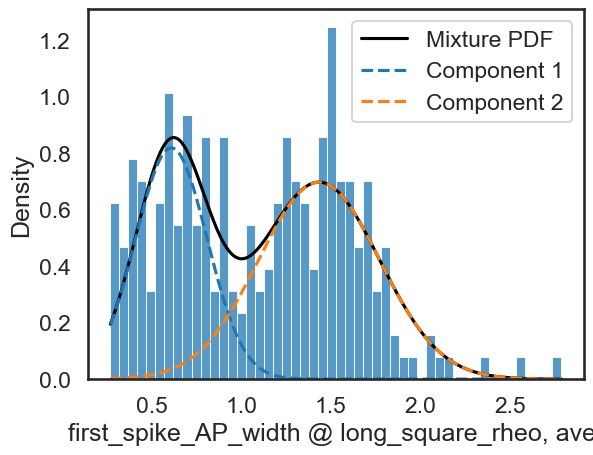

In [24]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

feature_name = "first_spike_AP_width @ long_square_rheo, aver"

aa = df_cell_stats[feature_name]
aa[aa > 10] = np.nan
sns.histplot(df_cell_stats[feature_name], bins=50, stat="density")

# Use mixed Gaussian KDE
# Fit a Gaussian Mixture Model to the data
from sklearn.mixture import GaussianMixture

# Remove NaN values for fitting
data = df_cell_stats[feature_name].dropna().values.reshape(-1, 1)

# Determine optimal number of components using BIC
n_components_range = range(1, 10)
bic_scores = []
models = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data)
    bic_scores.append(gmm.bic(data))
    models.append(gmm)

# Select the model with the lowest BIC score
best_model_idx = np.argmin(bic_scores)
best_model = models[best_model_idx]
n_components_optimal = n_components_range[best_model_idx]

print(f"Optimal number of components: {n_components_optimal}")

# Create a range of x values for plotting the GMM
x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
logprob = best_model.score_samples(x)
responsibilities = best_model.predict_proba(x)

# Plot the GMM components
pdf = np.exp(logprob)
plt.plot(x, pdf, 'k-', label='Mixture PDF')

# Plot individual Gaussian components
for i in range(n_components_optimal):
    pdf_component = responsibilities[:, i] * pdf
    plt.plot(x, pdf_component, '--', label=f'Component {i+1}')

plt.legend()

plt.show()

In [96]:
df_cell_stats["first_spike_AP_duration_half_width @ short_square_rheo, aver"].notna().sum()

np.int64(253)

In [97]:
df_cell_stats["first_spike_AP_duration_half_width @ short_square_rheo, aver"].max()

np.float64(2.5222222222199284)

In [74]:
import seaborn as sns
import pandas as pd

from LCNE_patchseq_analysis.data_util.metadata import load_ephys_metadata
df = load_ephys_metadata().rename(columns={"ephys_roi_id_tab_master": "ephys_roi_id"})
df.merge(df_cell_stats, on="ephys_roi_id", how="left")

/Users/han.hou/Scripts/LCNE-patchseq-analysis/src/LCNE_patchseq_analysis/data_util/metadata.py:100: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1418804349' '1418799012' '1418797120' '1418784590' '1418553949'
 '1418549638' '1418547172' '1418555572' '1418561975' '1417392272'
 '1417382638' '1417380803' '1417375160' '1417373093' '1417138763'
 '1410945226' '1410934497' '1410934898' '1410948835' '1410946049'
 '1410948417' '1410793905' '1410790193' '1410789816' '1410668927'
 '1410648389' '1410644456' '1410641516' '1410640994' '1410640556'
 '1410640157' '1410117614' '1410115593' '1410123885' '1410108467'
 '1409794620' '1409801288' '1409787965' '1409787035' '1408898882'
 '1408906258' '1408904257' '1408903873' '1408898832' '1408897096'
 '1408896351' '1408891476' '1408891040' '1408379787' '1408392699'
 '1408379728' '1408383903' '1408382056' '1408393162' '1408386647'
 '1408387866' '1408391640' '1408234242' '1408243563' '14

,Date,donor,jem-id_cell_specimen,cell_specimen_id_tab_master,type of experiment,injection region,virus,jem-status_reporter,jem-id_patched_cell_container,jem-id_patched_cell_container.1,...,peak_deltav_short_square,cell_specimen_id_lims,code,ephys_roi_id_lims,ephys_qc_lims,patched_cell_container,storage_directory_lims,spreadsheet_or_lims,storage_directory_combined,"first_spike_AP_width @ short_square_rheo, aver"
0,2025-02-06,NaN,C57BL6J-785653.03.02.02,1.418805e+09,NaN,NaN,CN3192,Positive,P4S4_250206_152_A01,P4S4_250206_152_A01,...,NaN,1.418805e+09,mIVSCC-MET-R01_LC,1418804349,auto_passed,P4S4_250206_152_A01,/allen/programs/celltypes/production/mousecell...,both,/allen/programs/celltypes/production/mousecell...,NaN
1,2025-02-06,NaN,C57BL6J-785653.04.02.02,1.418799e+09,NaN,NaN,CN3192,Positive,PVS4_250206_452_A01,PVS4_250206_452_A01,...,63.875000,1.418799e+09,mIVSCC-MET-R01_LC,1418799012,auto_passed,PVS4_250206_452_A01,/allen/programs/celltypes/production/mousecell...,both,/allen/programs/celltypes/production/mousecell...,0.420000
2,2025-02-06,NaN,C57BL6J-785653.03.02.01,1.418797e+09,NaN,NaN,CN3192,Positive,P4S4_250206_151_A01,P4S4_250206_151_A01,...,64.281250,1.418797e+09,mIVSCC-MET-R01_LC,1418797120,auto_passed,P4S4_250206_151_A01,/allen/programs/celltypes/production/mousecell...,both,/allen/programs/celltypes/production/mousecell...,0.833333
3,2025-02-06,NaN,C57BL6J-785653.04.02.01,1.418785e+09,NaN,NaN,CN3192,Positive,PVS4_250206_451_A01,PVS4_250206_451_A01,...,45.406254,1.418785e+09,mIVSCC-MET-R01_LC,1418784590,auto_passed,PVS4_250206_451_A01,/allen/programs/celltypes/production/mousecell...,both,/allen/programs/celltypes/production/mousecell...,0.753333
4,2025-02-05,NaN,C57BL6J-785652.03.02.02,1.418554e+09,NaN,NaN,CN3192,Positive,NaN,NaN,...,42.593753,1.418554e+09,mIVSCC-MET-R01_LC,1418553949,auto_passed,NaN,/allen/programs/celltypes/production/mousecell...,both,/allen/programs/celltypes/production/mousecell...,1.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2022-09-20,643791.0,Gad2-IRES-Cre;Ai14-643791.10.06.02,1.212558e+09,NaN,NaN,NaN,Negative,P4S4_220920_152_A01,P4S4_220920_152_A01,...,38.187500,NaN,NaN,,NaN,NaN,NaN,spreadsheet_only,/allen/programs/celltypes/production/mousecell...,0.340000
267,2022-09-20,643791.0,Gad2-IRES-Cre;Ai14-643791.10.06.01,1.212547e+09,NaN,NaN,NaN,Negative,P4S4_220920_151_A01,P4S4_220920_151_A01,...,58.343752,NaN,NaN,,NaN,NaN,NaN,spreadsheet_only,/allen/programs/celltypes/production/mousecell...,0.360000
268,2022-09-20,NaN,Gad2-IRES-Cre;Ai14-643791.10.06.03,1.212573e+09,NaN,NaN,NaN,Negative,P4S4_220920_153_A01,P4S4_220920_153_A01,...,68.562504,NaN,NaN,,NaN,NaN,NaN,spreadsheet_only,/allen/programs/celltypes/production/mousecell...,0.340000
269,2022-09-20,NaN,Gad2-IRES-Cre;Ai14-643791.10.06.04,1.212580e+09,NaN,NaN,NaN,Negative,P4S4_220920_154_A01,P4S4_220920_154_A01,...,82.968758,NaN,NaN,,NaN,NaN,NaN,spreadsheet_only,/allen/programs/celltypes/production/mousecell...,0.560000
